Vaccinations

https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-age-group.csv

How do US vaccinations compare to other countries like Japan?

Which country is the least totally vaccinated (relative)?

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vaccination-data.csv')
print(df.describe())



       TOTAL_VACCINATIONS  PERSONS_VACCINATED_1PLUS_DOSE  \
count        2.280000e+02                   2.270000e+02   
mean         4.694756e+07                   2.187060e+07   
std          2.442809e+08                   1.090964e+08   
min          7.400000e+01                   3.700000e+01   
25%          3.534380e+05                   1.733685e+05   
50%          2.721102e+06                   1.536112e+06   
75%          1.670141e+07                   7.843871e+06   
max          3.138003e+09                   1.276556e+09   

       TOTAL_VACCINATIONS_PER100  PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
count                 228.000000                            227.000000   
mean                  122.156500                             55.765784   
std                    71.896713                             27.044030   
min                     0.097000                              0.082000   
25%                    62.841000                             34.350500   
50%            

In [100]:
print(list(df))
print(df.index)

['COUNTRY', 'ISO3', 'WHO_REGION', 'DATA_SOURCE', 'DATE_UPDATED', 'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE', 'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100', 'VACCINES_USED', 'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED']
RangeIndex(start=0, stop=228, step=1)


<AxesSubplot:xlabel='COUNTRY'>

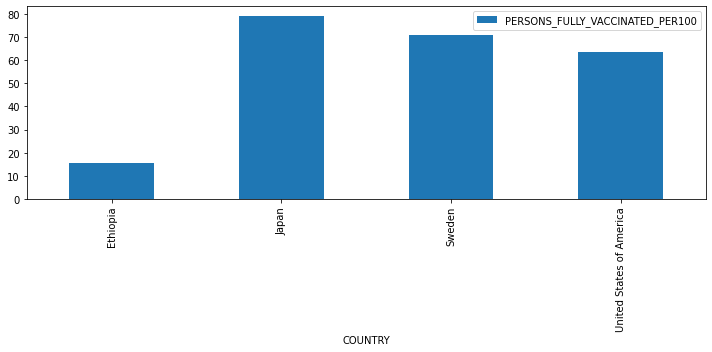

In [115]:
df[((df['COUNTRY'] == 'United States of America') | (df['COUNTRY'] == 'Sweden') | (df['COUNTRY'] == 'Ethiopia') | (df['COUNTRY'] == 'Japan'))].plot.bar(x='COUNTRY', y='PERSONS_FULLY_VACCINATED_PER100')


<AxesSubplot:xlabel='COUNTRY'>

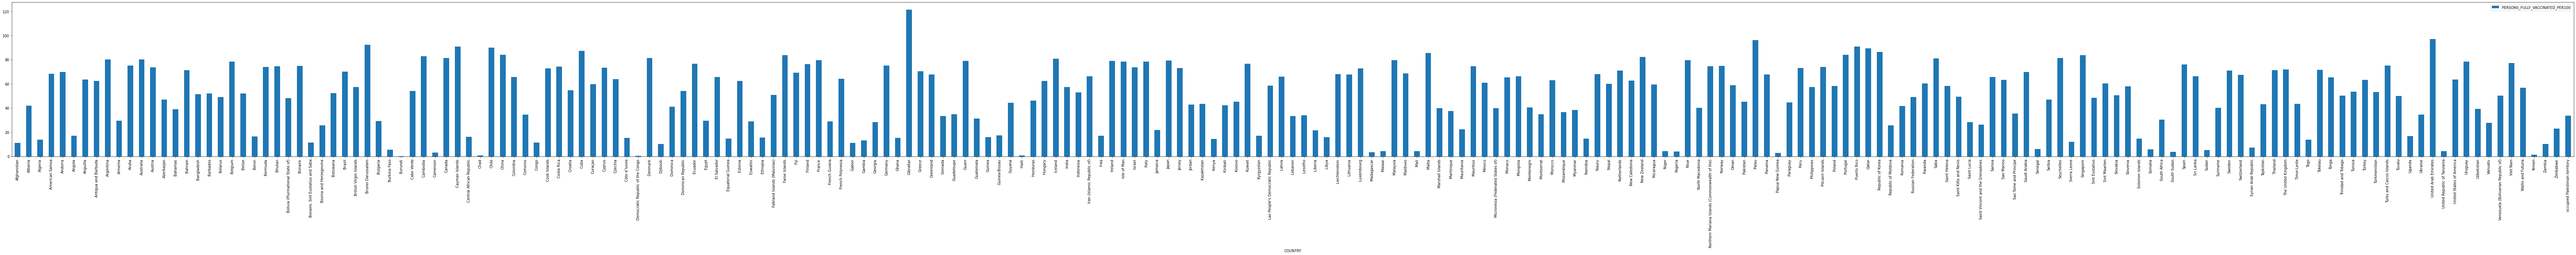

In [135]:
plt.rcParams["figure.figsize"] = [100, 10]
pt = pd.pivot_table(df, index='COUNTRY', values='PERSONS_FULLY_VACCINATED_PER100')
pt.plot.bar()

<AxesSubplot:xlabel='WHO_REGION'>

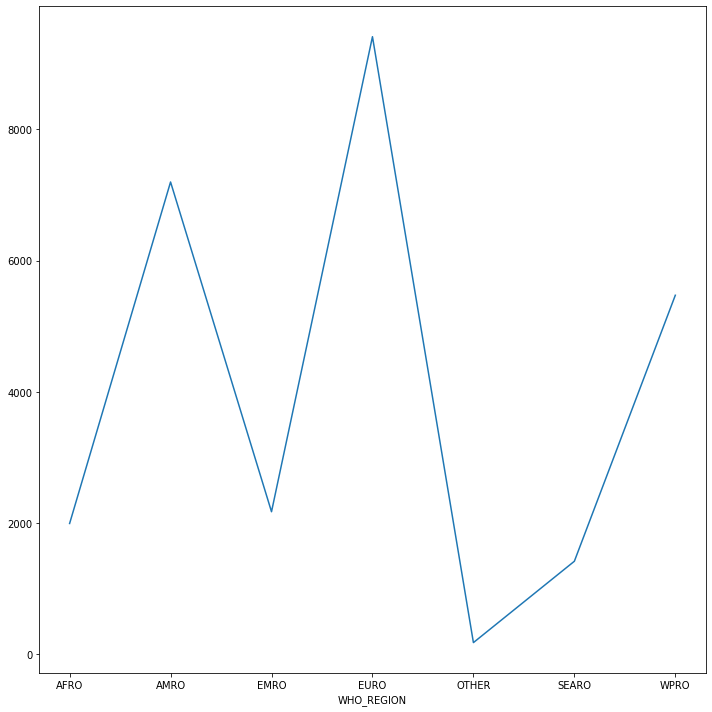

In [131]:
plt.rcParams["figure.figsize"] = [10, 10]
ag = df.groupby('WHO_REGION')['TOTAL_VACCINATIONS_PER100'].sum()
ag.plot.line(x='WHO_REGION', y='TOTAL_VACCINATIONS_PER100')

So for my first question I compared the US to Japan, Sweden, and Ethiopia.  I found that the US is slightly behind in vaccinations per 100 from Sweden and Japan respectively, but is ahead of Ethiopia by several multiples.  This makes sense as Japan and Sweden are smaller, more concentrated countries so are easier to vaccinate, as well as different political climates.  Ethiopia is not as developed as the rest of the three countries so it also makes sense their vaccinations are lower due to factors like vaccine supply and public knowledge.

My second question asked which country is the least totally vaccinated relative to their population.  I actually found that to be Burundi, which has a 0.077 per 100 totally vaccinated.  I double checked and in the raw data that number is true.  WHO describes this statistic to be "Cumulative number of persons fully vaccinated per 100 population", I believe we're seeing this with Burundi because they only have access to the "Beijing CNBG - BBIBP-CorV" vaccine, and it's likely in limited numbers and not enough for individuals to be totally vaccinated (but probably have 1 shot in).
